<h1>Installation</h1>
pytorch-p38 image

In [1]:
!pip install -q espnet==0.10.6 
!echo 'espnet installed'
!pip install -q pypinyin 
!echo 'pypinyin install'
!pip install -qU parallel-wavegan
!echo 'PWGAN installed'

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
espnet installed
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
pypinyin install
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
PWGAN installed


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd


In [4]:
from espnet2.bin.tts_inference import Text2Speech
from espnet2.utils.types import str_or_none

<h1>Load individually </h1>

<h3> import mel2tex and vocoder</h3>

In [16]:
# %%bash
# configure AWs from cli
# source=s3://commonvoicesdataset/Text2Speech/Jevenies/Javanese22050/exp.zip
# destination=/home/ec2-user/SageMaker/JavanieseData
# echo $source
# echo $destination

!aws s3 cp s3://commonvoicesdataset/Text2Speech/Jevenies/Javanese22050/exp.zip /home/ec2-user/SageMaker/JavanieseData

download: s3://commonvoicesdataset/Text2Speech/Jevenies/Javanese22050/exp.zip to JavanieseData/exp.zip


In [17]:
!unzip JavanieseData/exp.zip

Archive:  JavanieseData/exp.zip
   creating: exp/
   creating: exp/tts_train_raw_char_tacotron/
  inflating: exp/tts_train_raw_char_tacotron/6epoch.pth  
  inflating: exp/tts_train_raw_char_tacotron/config.yaml  
   creating: exp/tts_train_raw_char_tacotron/tensorboard/
   creating: exp/tts_train_raw_char_tacotron/tensorboard/valid/
  inflating: exp/tts_train_raw_char_tacotron/tensorboard/valid/events.out.tfevents.1653043257.ip-172-16-70-24.eu-west-1.compute.internal.16184.1  
   creating: exp/tts_train_raw_char_tacotron/tensorboard/train/
  inflating: exp/tts_train_raw_char_tacotron/tensorboard/train/events.out.tfevents.1653043257.ip-172-16-70-24.eu-west-1.compute.internal.16184.0  
  inflating: exp/tts_train_raw_char_tacotron/8epoch.pth  
   creating: exp/tts_train_raw_char_tacotron/att_ws/
   creating: exp/tts_train_raw_char_tacotron/att_ws/jvf_07638_01494468401/
  inflating: exp/tts_train_raw_char_tacotron/att_ws/jvf_07638_01494468401/tts.dec.att.176ep.png  
  inflating: exp/tts_tr

<h3>Import vocoder </h3>

In [23]:
%%bash

source=s3://commonvoicesdataset/Text2Speech/Jevenies/Javanese22050/decoder
destination=/home/ec2-user/SageMaker/JavanieseData/
echo $source
aws s3 cp $source $destination --recursive

s3://commonvoicesdataset/Text2Speech/Jevenies/Javanese22050/decoder
download: s3://commonvoicesdataset/Text2Speech/Jevenies/Javanese22050/decoder/config.yml to JavanieseData/config.yml
download: s3://commonvoicesdataset/Text2Speech/Jevenies/Javanese22050/decoder/stats.h5 to JavanieseData/stats.h5
download: s3://commonvoicesdataset/Text2Speech/Jevenies/Javanese22050/decoder/checkpoint-130000steps.pkl to JavanieseData/checkpoint-130000steps.pkl


<hr>

<h3>Or load the only three files you want:
    config
    model
    stats</h3>

In [34]:
#import decoder

# stats
!aws s3 cp s3://commonvoicesdataset/Text2Speech/......./...../decoder/stats.h5  /home/ec2-user/SageMaker/GermanData/decoder
    
#model file 
!aws s3 cp s3://commonvoicesdataset/Text2Speech/..../...../decoder/checkpoint-.....steps.pkl  /home/ec2-user/SageMaker/GermanData/decoder

# config file
!aws s3 cp s3://commonvoicesdataset/Text2Speech/..../..../decoder/config.yml  /home/ec2-user/SageMaker/GermanData/decoder

download: s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/decoder/stats.h5 to GermanData/decoder/stats.h5
download: s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/decoder/checkpoint-400000steps.pkl to GermanData/decoder/checkpoint-400000steps.pkl
download: s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/decoder/config.yml to GermanData/decoder/config.yml


<hr>

<h1>Load model artifacts using bash</h1>

In [141]:
%%bash


#artifacts structure :
# --------------------------------- Mel2text-----------------------------------------------
#folder with data for mel2text: it has to sub-folders:a folder that holds the name to the traning data and 
#a folder that holds the stats . we use stats of the training data
# 
#        mel2text_folder\
#                         tacotron_training_folder_name\
#                                     config.yml  # config file 
#                                     epochX.pth #name of the model
#                         tacotron_stats_folder_name\
#                                     train\
#                                         feats_stats.npz
# -------------------------------------------------------------------------------------------
# ----------------------------------vocoder--------------------------------------------------
#      vocoder_training_folder_name\
#                                   stats.h5
#                                   model.pth 
#                                   config.yml
# --------------------------------------------------------------------------------------------

language='Jevenies'


#s3 tacotron folder names

taco_source=s3://commonvoicesdataset/Text2Speech/Jevenies/Javanese22050
taco_root_fldr=exp
taco_train_fldr=tts_train_raw_char_tacotron
taco_stats_fldr=tts_stats_raw_char_tacotron
taco_stats_subf=train
mel2text_model=200epoch.pth 
mel2text_stats=feats_stats.npz
met2text_config=config.yaml

source_taco_model=${taco_source}/${taco_root_fldr}/${taco_train_fldr}/${mel2text_model}
source_taco_config=${taco_source}/${taco_root_fldr}/${taco_train_fldr}/${met2text_config}
source_taco_stats=${taco_source}/${taco_root_fldr}/${taco_stats_fldr}/${taco_stats_subf}/${mel2text_stats}

# echo "source taco path"
# echo ${source_taco_model}
# echo ${source_taco_config}
# echo ${source_taco_stats}

#s3 tacotron vocoder file names 

source_vocoder=s3://commonvoicesdataset/Text2Speech/Jevenies/Javanese22050
vocoder_root_fldr=vocoder/train_nodev_parallel_wavegan.v1
vocoder_stats=stats.h5
vocoder_config=config.yml
vocoder_model=checkpoint-320000steps.pkl

source_vocoder_model=${source_vocoder}/${vocoder_root_fldr}/${vocoder_model}
source_vocoder_stats=${source_vocoder}/${vocoder_root_fldr}/${vocoder_stats}
source_vocoder_config=${source_vocoder}/${vocoder_root_fldr}/${vocoder_config}

# echo "source vocoder path"
# echo ${source_vocoder_model}
# echo ${source_vocoder_stats}
# echo ${source_vocoder_config}


# create local folders 
language='jevenese'

mel2txt_folder_name=exp 
vocoder_folder_name=vocoder
tacotron_training_folder=train 

taco_train_fldr=tts_train_raw_char_tacotron
taco_stats_fldr=tts_stats_raw_char_tacotron

root=/home/ec2-user/SageMaker/${language}_artifacts
vocoder=${root}/${vocoder_folder_name}

mel2txt=${root}/${mel2txt_folder_name}
exp_train=${mel2txt}/${taco_train_fldr}
exp_stats=${mel2txt}/${taco_stats_fldr}
exp_s_tr=${exp_stats}/train


[[ -d ${root} ]]          && echo "Path: ${root} exists nothing created"         || mkdir -v ${root} 
[[ -d ${vocoder} ]]       && echo "Path: ${vocoder} exists nothing created"      || mkdir -v ${vocoder}
[[ -d ${mel2txt} ]]       && echo "Path: ${mel2txt} exists nothing created"      || mkdir -v ${mel2txt}
[[ -d ${exp_train} ]]     && echo "Path: ${exp_train} exists nothing created"    || mkdir -v ${exp_train}
[[ -d ${exp_stats} ]]     && echo "Path: ${exp_stats} exists nothing created"    || mkdir -v ${exp_stats}
[[ -d ${exp_s_tr} ]]      && echo "Path: ${exp_s_tr} exists nothing created"     || mkdir -v ${exp_s_tr}

echo " "
echo " "
echo " "

# copy artifacts 

aws s3 cp ${source_taco_model} ${exp_train}
aws s3 cp ${source_taco_stats} ${exp_s_tr}
aws s3 cp ${source_taco_config} ${exp_train}

aws s3 cp ${source_vocoder_model} ${vocoder}
aws s3 cp ${source_vocoder_stats} ${vocoder}
aws s3 cp ${source_vocoder_config} ${vocoder}

#inference path 
inf_taco_model=${exp_train}/${mel2text_model}
inf_taco_config=${exp_train}/${met2text_config}
inf_taco_stats=${exp_s_tr}/${mel2text_stats}

inf_vocoder_model=${vocoder}/${vocoder_model}
inf_vocoder_stats=${vocoder}/${vocoder_stats}
inf_vocoder_config=${vocoder}/${vocoder_config}

info_path=${root}/inf_path.txt
[[ -f ${info_path} ]] && rm ${root}/inf_path.txt 
[[ ! -f ${info_path} ]] && touch ${root}/inf_path.txt
# echo "tacotron files"
printf "taco_model,${inf_taco_model}\n"   >> ${root}/inf_path.txt
printf "taco_config,${inf_taco_config}\n" >> ${root}/inf_path.txt
printf "taco_stats,${inf_taco_stats}\n"  >> ${root}/inf_path.txt


# echo "vocoder files"
printf "vocoder_model,${inf_vocoder_model}\n"   >> ${root}/inf_path.txt
printf "vocoder_stats,${inf_vocoder_stats}\n"   >> ${root}/inf_path.txt
printf "vocoder_config,${inf_vocoder_config}\n" >> ${root}/inf_path.txt


Path: /home/ec2-user/SageMaker/jevenese_artifacts exists nothing created
Path: /home/ec2-user/SageMaker/jevenese_artifacts/vocoder exists nothing created
Path: /home/ec2-user/SageMaker/jevenese_artifacts/exp exists nothing created
Path: /home/ec2-user/SageMaker/jevenese_artifacts/exp/tts_train_raw_char_tacotron exists nothing created
Path: /home/ec2-user/SageMaker/jevenese_artifacts/exp/tts_stats_raw_char_tacotron exists nothing created
Path: /home/ec2-user/SageMaker/jevenese_artifacts/exp/tts_stats_raw_char_tacotron/train exists nothing created
 
 
 
download: s3://commonvoicesdataset/Text2Speech/Jevenies/Javanese22050/exp/tts_train_raw_char_tacotron/200epoch.pth to exp/tts_train_raw_char_tacotron/200epoch.pth
download: s3://commonvoicesdataset/Text2Speech/Jevenies/Javanese22050/exp/tts_stats_raw_char_tacotron/train/feats_stats.npz to exp/tts_stats_raw_char_tacotron/train/feats_stats.npz
download: s3://commonvoicesdataset/Text2Speech/Jevenies/Javanese22050/exp/tts_train_raw_char_tacot

In [73]:
pwd

'/home/ec2-user/SageMaker'

<h1>Load model</h1>

<h3> Using bash</h3>

In [6]:
#read the text file

path='/home/ec2-user/SageMaker/jevenese_artifacts/inf_path.txt'
p={}
with open(path,mode='r',encoding='utf8',newline='\n') as file:    
    for idx,line in enumerate(file):        
         p[str(line.split(',')[0])]=line.split(',')[1].split('\n')[0]
#          print(line)


In [7]:
%cd '/home/ec2-user/SageMaker/jevenese_artifacts/'

/home/ec2-user/SageMaker/jevenese_artifacts


In [8]:
tts_GL = Text2Speech.from_pretrained(model_file=p['taco_model'])
tts_WGAN = Text2Speech.from_pretrained(model_file=p['taco_model'],vocoder_file=p['vocoder_model'])

In [108]:
#decode input 
text = 'Hai. Mugi-mugi panjenengan sami sehat ing dinten punika'
wav = tts_WGAN(text)["wav"]
#plot wave
sr = 22050
# wav1 = wav.cpu().detach().numpy()
# plt.figure(figsize=(14, 5))
# librosa.display.waveshow(wav1, sr=22050)
#listen to results
ipd.Audio(wav, rate=sr) # load a NumPy array

In [11]:
import time
import torch

# decide the input sentence by yourself
# print(f"Input your favorite sentence in {lang}.")
# x = input()
x = 'shashidam to in traffic che vazeshe akhe' 
# synthesis
# for J in range(10):
with torch.no_grad():
    start = time.time()
    wav = tts_WGAN(x)["wav"]
rtf = (time.time() - start) / (len(wav) / tts_WGAN.fs)
print(f"RTF = {rtf:5f}")

# let us listen to generated samples
from IPython.display import display, Audio
display(Audio(wav.view(-1).cpu().numpy(), rate=tts_WGAN.fs))

RTF = 2.119410


In [115]:
import soundfile as sf
sf.write('results.wav',wav,sr)


<h3>load form manual </h3>

In [4]:
import os

model_root = '/home/ec2-user/SageMaker/JavanieseData/exp/tts_train_raw_char_tacotron'

model = '200epoch.pth'
model_file = os.path.join(model_root,model)
print(model_file)

vocoder= 'checkpoint-180000steps.pkl'
root = '/home/ec2-user/SageMaker/JavanieseData/decoder/'
                    
vocoder_file = os.path.join(root,vocoder)
print(vocoder_file)

/home/ec2-user/SageMaker/JavanieseData/exp/tts_train_raw_char_tacotron/200epoch.pth
/home/ec2-user/SageMaker/JavanieseData/decoder/checkpoint-180000steps.pkl


In [4]:
%cd /home/ec2-user/SageMaker/JavanieseData/

/home/ec2-user/SageMaker/JavanieseData


In [5]:
tts_GL = Text2Speech.from_pretrained(model_file=model_file)

In [6]:
tts_WGAN = Text2Speech.from_pretrained(model_file=model_file,vocoder_file=vocoder_file)

In [ ]:
text = 'Hai. Mugi-mugi panjenengan sami sehat ing dinten punika'

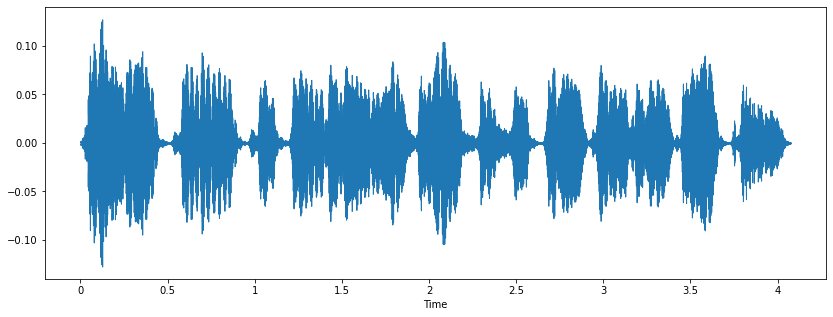

In [21]:
#decode input 
wav = tts_GL(text)["wav"]
#plot wave
sr = 22050
wav1 = wav.cpu().detach().numpy()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(wav1, sr=22050)
# listen to results
ipd.Audio(wav, rate=sr) # load a NumPy array

In [8]:
#decode input 
wav = tts_WGAN(text)["wav"]
#plot wave
sr = 22050
# wav1 = wav.cpu().detach().numpy()
# plt.figure(figsize=(14, 5))
# librosa.display.waveshow(wav1, sr=22050)
#listen to results
ipd.Audio(wav, rate=sr) # load a NumPy array

In [16]:
ipd.Audio(wav, rate=22050) # load a NumPy array

<hr>

<h1>Inference on a number of data for evaluation </h1>

In [171]:
%%writefile /home/ec2-user/SageMaker/Javanese_reults/samples.txt
vf_07638_01478275132|na lukisan sing kaya wong lanang nangis temenan ning museum affandi
jvf_07638_01494468401|shanty pegel kabeh awake sakmarine tandang gawe resik resik omah
jvf_07638_01505451481|nguleni adonan setunggal jam seprapat ngantos pegel lengen kula
jvf_07638_01507058966|abunganku wis ana pirang atus ewu ya ning bank b_letter n_letter i_letter
jvf_07638_01515427944|jare wong wong new delhi kuwi panas lan gersang
jvf_07638_01517360243|undanganipun si ten meruya nggih
jvf_07638_01550454242|griya eyang putri kula ing pesona khayangan blok a_letter nomer gangsal welas
jvf_07638_01560194605|masio anake wis telu darius sinathrya jik sempet metu lunga dhewe
jvf_07638_01566002911|d_letter h_letter l_letter nang daerah jakarta selatan iku nang endi
jvf_07638_01593208766|nèk shafira kantore ning cedak air mancur
jvf_07638_01611735692|om purwo mirsani gosip ingkang dipunsiaraken rajawali t_letter v_letter
jvf_07638_01620941597|kancaku pas semester siji backpackeran marang baluran
jvf_07638_01631822468|sandy tumiwa tanglet badhe tindak wayah napa
jvf_07638_01633244132|michael jordan nglebokna bal basket nang ring ping sèket
jvf_07638_01685364419|emandangan ning iceland apik tenan
jvf_07638_01685493981|otonganmu tambah mbois pas nggawe sepatu reebok iku
jvf_07638_01688918433|nek_conj zyrex kira kira kualitase piye
jvf_07638_01713073091|lippo group kuwi sing mbangun padusan kanggo cah cilik cilik kae
jvf_07638_01741518488|ngubungi call center pahala kencana kok ora nyambung
jvf_07638_01748483439|rupane kaya jurang lan alas pas ning kebun buah mangunan
jvf_07638_01761590182|turunane saiki padha manggon ning johor bahru

Writing /home/ec2-user/SageMaker/Javanese_reults/samples.txt


In [141]:
pwd

'/home/ec2-user/SageMaker/jevenese_artifacts'

In [15]:
# wavs_folder_path = '/home/ec2-user/SageMaker/espnet/egs2/German_Male/tts1/wavs'
import os
import time
import soundfile as sf
import json
import shutil

result_folder = '/home/ec2-user/SageMaker/Javanese_reults'
result_batch = os.path.join(result_folder,'batch_result')

if os.path.exists(result_batch):
    shutil.rmtree(result_batch)
os.makedirs(result_batch)


with open(os.path.join(result_folder,'samples.txt'),'r') as file:
    lines = file.readlines()

sample_num = []
wave_name  = []
text       = []
wave_path  = []
data_dict  = {}
rtf        = {}
for idx,line in enumerate(lines):
    print(idx)
    sample_num.append(line.split('|')[0])
    text = line.split('|')[1].split('\n')[0]
    with torch.no_grad():
        start = time.time()
        wav = tts_WGAN(text)["wav"]
        file_name = str(line.split('|')[0])+'.wav'
        sf.write(os.path.join(result_batch,file_name),wav,samplerate=22050)
        rtf[file_name]=(time.time() - start) / (len(wav) / tts_WGAN.fs)
#          print("file {} processed".format(idx))
with open(os.path.join(result_batch,'times.json'),'w') as file:
    json.dump(rtf,file)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
